# Use Tensorflow to recognize hand-written digits with Watson Machine Learning REST API

This notebook contains steps and code to demonstrate support of Tensordlow Deep Learning experiments in Watson Machine Learning Service. It introduces commands for getting data, training experiments, persisting pipelines, publishing models, deploying models and scoring.

Some familiarity with cURL is helpful. This notebook uses cURL examples.


## Learning goals

The learning goals of this notebook are:

-  Working with Watson Machine Learning experiments to train Deep Learning models.
-  Downloading computed models to local storage.
-  Online deployment and scoring of trained model.


## Contents

This notebook contains the following parts:

1.	[Setup](#setup)  
2.	[Experiment definition](#experiment_definition)  
3.  [Model definition](#model_definition)  
4.	[Experiment Run](#run)  
5.	[Historical runs](#runs)  
6.	[Deploy and Score](#deploy_and_score)  
7.	[Cleaning](#cleaning)   
8.	[Summary and next steps](#summary)

<a id="setup"></a>
## 1. Set up the environment

Before you use the sample code in this notebook, you must perform the following setup tasks:

-  Create a <a href="https://console.ng.bluemix.net/catalog/services/ibm-watson-machine-learning/" target="_blank" rel="noopener no referrer">Watson Machine Learning (WML) Service</a> instance (a free plan is offered and information about how to create the instance can be found <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-service-instance.html?context=analytics" target="_blank" rel="noopener no referrer">here</a>).
-  Create a <a href="https://console.bluemix.net/catalog/infrastructure/cloud-object-storage" target="_blank" rel="noopener no referrer">Cloud Object Storage (COS)</a> instance (a lite plan is offered and information about how to order storage can be found <a href="https://console.bluemix.net/docs/services/cloud-object-storage/basics/order-storage.html#order-storage" target="_blank" rel="noopener no referrer">here</a>). <br/>**Note: When using Watson Studio, you already have a COS instance associated with the project you are running the notebook in.**

You can find your COS credentials in COS instance dashboard under the **Service credentials** tab.
Go to the **Endpoint** tab in the COS instance's dashboard to get the endpoint information.

Authenticate the Watson Machine Learning service on IBM Cloud.

Your Cloud API key can be generated by going to the [**Users** section of the Cloud console](https://cloud.ibm.com/iam#/users). From that page, click your name, scroll down to the **API Keys** section, and click **Create an IBM Cloud API key**. Give your key a name and click **Create**, then copy the created key and paste it below.  

**NOTE:** You can also get service specific apikey by going to the [**Service IDs** section of the Cloud Console](https://cloud.ibm.com/iam/serviceids).  From that page, click **Create**, then copy the created key and paste it below.  


In [ ]:
%env API_KEY=...
%env WML_ENDPOINT_URL=...
%env WML_INSTANCE_CRN="fill out only if you want to create a new space"
%env WML_INSTANCE_NAME=...

%env COS_CRN="fill out only if you want to create a new space"
%env COS_ENDPOINT=...
%env COS_BUCKET=...
%env COS_ACCESS_KEY_ID=...
%env COS_SECRET_ACCESS_KEY=...
%env COS_API_KEY=...

%env SPACE_ID="fill out only if you have space already created"

%env DATAPLATFORM_URL=https://api.dataplatform.cloud.ibm.com   
%env AUTH_ENDPOINT=https://iam.cloud.ibm.com/oidc/token

<a id="wml_token"></a>
### Getting WML authorization token for further cURL calls

<a href="https://cloud.ibm.com/docs/cloud-object-storage?topic=cloud-object-storage-curl#curl-token" target="_blank" rel="noopener no referrer">Example of cURL call to get WML token</a>

In [2]:
%%bash --out token

curl -sk -X POST \
    --header "Content-Type: application/x-www-form-urlencoded" \
    --header "Accept: application/json" \
    --data-urlencode "grant_type=urn:ibm:params:oauth:grant-type:apikey" \
    --data-urlencode "apikey=$API_KEY" \
    "$AUTH_ENDPOINT" \
    | cut -d '"' -f 4

In [3]:
%env TOKEN=$token 

env: TOKEN=eyJraWQiOiIyMDIwMDgyMzE4MzIiLCJhbGciOiJSUzI1NiJ9.eyJpYW1faWQiOiJJQk1pZC01NTAwMDA5MVZDIiwiaWQiOiJJQk1pZC01NTAwMDA5MVZDIiwicmVhbG1pZCI6IklCTWlkIiwiaWRlbnRpZmllciI6IjU1MDAwMDkxVkMiLCJnaXZlbl9uYW1lIjoiV01MIiwiZmFtaWx5X25hbWUiOiJXTUwtQmV0YSIsIm5hbWUiOiJXTUwgV01MLUJldGEiLCJlbWFpbCI6IldNTC1CZXRhQHBsLmlibS5jb20iLCJzdWIiOiJXTUwtQmV0YUBwbC5pYm0uY29tIiwiYWNjb3VudCI6eyJ2YWxpZCI6dHJ1ZSwiYnNzIjoiZTBmN2VjM2FjMWIyNGVjOWFlNzcxZWZkNzcyNTM4YTIiLCJpbXNfdXNlcl9pZCI6IjcxNzY5NDMiLCJmcm96ZW4iOnRydWUsImltcyI6IjE2ODQ3ODMifSwiaWF0IjoxNjAwMDkxNTMxLCJleHAiOjE2MDAwOTUxMzEsImlzcyI6Imh0dHBzOi8vaWFtLmNsb3VkLmlibS5jb20vaWRlbnRpdHkiLCJncmFudF90eXBlIjoidXJuOmlibTpwYXJhbXM6b2F1dGg6Z3JhbnQtdHlwZTphcGlrZXkiLCJzY29wZSI6ImlibSBvcGVuaWQiLCJjbGllbnRfaWQiOiJkZWZhdWx0IiwiYWNyIjoxLCJhbXIiOlsicHdkIl19.YGcgaVPGcLhX2HqKvcgwFsDXUTQprLTWhNRWRyiYgD3-xg1MRQEwoQ35jrqVRU3iYhNRdog3MQF9pm-H-IhcTI3x0M_JCQykXmSQ0mf5Nk-6oPuYpIEirMSNt06kkqQmiJREccTb9qIyXdOhUGICsWC_-fiioThM7maS0TRY3Bd-dPA5kOUvOWCZQ5qdKZEV0nNL4blvK0HlFgDVKdX2y1MWeNBVYLH

<a id="space_creation"></a>
### Space creation
**Tip:** If you do not have `space` already created, please convert below three cells to `code` and run them.

First of all, you need to create a `space` that will be used in all of your further cURL calls. 
If you do not have `space` already created, below is the cURL call to create one.

<a href="https://cpd-spaces-api.eu-gb.cf.appdomain.cloud/#/Spaces/spaces_create" 
target="_blank" rel="noopener no referrer">Space creation</a>

Space creation is asynchronous. This means that you need to check space creation status after creation call.
Make sure that your newly created space is `active`.

<a href="https://cpd-spaces-api.eu-gb.cf.appdomain.cloud/#/Spaces/spaces_get" 
target="_blank" rel="noopener no referrer">Get space information</a>

<a id="experiment_definition"></a>
## 2. Experiment / optimizer configuration

<a id="training_connection"></a>
### Training data connection

Define connection information to COS bucket and training data npz file. This example uses the MNIST dataset.   
**Action**: Upload training data to COS bucket and enter location information in the next cURL examples.

In [4]:
%%bash --out data_links

declare -a data_links=('https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/data/mnist/raw/train-images-idx3-ubyte.gz'
                       'https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/data/mnist/raw/train-labels-idx1-ubyte.gz'
                       'https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/data/mnist/raw/t10k-images-idx3-ubyte.gz'
                       'https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/data/mnist/raw/t10k-labels-idx1-ubyte.gz')

echo ${data_links[@]}

In [5]:
%%bash -s "$data_links"

for data_link in $1
do
    wget -q $data_link
done

<a id="cos_token"></a>
### Get COS token
Retrieve COS token for further authentication calls.

<a href="https://cloud.ibm.com/docs/cloud-object-storage?topic=cloud-object-storage-curl#curl-token" 
target="_blank" rel="noopener no referrer">Retrieve COS authentication token</a>

In [6]:
%%bash --out cos_token

curl -s -X "POST" "$AUTH_ENDPOINT" \
     -H 'Accept: application/json' \
     -H 'Content-Type: application/x-www-form-urlencoded' \
     --data-urlencode "apikey=$COS_API_KEY" \
     --data-urlencode "response_type=cloud_iam" \
     --data-urlencode "grant_type=urn:ibm:params:oauth:grant-type:apikey" \
     | cut -d '"' -f 4

In [7]:
%env COS_TOKEN=$cos_token

env: COS_TOKEN=eyJraWQiOiIyMDIwMDgyMzE4MzIiLCJhbGciOiJSUzI1NiJ9.eyJpYW1faWQiOiJpYW0tU2VydmljZUlkLTU3MzMwOTM3LWJkNTQtNDYyYi04ODUxLWY3OTFhZDYyYzY1OSIsImlkIjoiaWFtLVNlcnZpY2VJZC01NzMzMDkzNy1iZDU0LTQ2MmItODg1MS1mNzkxYWQ2MmM2NTkiLCJyZWFsbWlkIjoiaWFtIiwiaWRlbnRpZmllciI6IlNlcnZpY2VJZC01NzMzMDkzNy1iZDU0LTQ2MmItODg1MS1mNzkxYWQ2MmM2NTkiLCJuYW1lIjoiY3JlZGVudGlhbHNfMSIsInN1YiI6IlNlcnZpY2VJZC01NzMzMDkzNy1iZDU0LTQ2MmItODg1MS1mNzkxYWQ2MmM2NTkiLCJzdWJfdHlwZSI6IlNlcnZpY2VJZCIsImFjY291bnQiOnsidmFsaWQiOnRydWUsImJzcyI6ImUwZjdlYzNhYzFiMjRlYzlhZTc3MWVmZDc3MjUzOGEyIiwiZnJvemVuIjp0cnVlfSwiaWF0IjoxNjAwMDkxNTQxLCJleHAiOjE2MDAwOTUxNDEsImlzcyI6Imh0dHBzOi8vaWFtLmNsb3VkLmlibS5jb20vaWRlbnRpdHkiLCJncmFudF90eXBlIjoidXJuOmlibTpwYXJhbXM6b2F1dGg6Z3JhbnQtdHlwZTphcGlrZXkiLCJzY29wZSI6ImlibSBvcGVuaWQiLCJjbGllbnRfaWQiOiJkZWZhdWx0IiwiYWNyIjoxLCJhbXIiOlsicHdkIl19.mxJNcPkAOgRvGChIE2fIOGZ2xib4hcCUEeGWvlMTF946jQWmdMendazkSCXODM9eE91L0pabkg8h4UJ_1BFR0E_NNEzBS-CmkFs3pweN87zTTg-HWpDTxk86dTFNIcJgWCedPOYdbxs-a6kD3caJW2plpWoqjrEjxwz-f7X

<a id="cos_upload"></a>
### Upload file to COS
Upload your local dataset into your COS bucket

<a href="https://cloud.ibm.com/docs/cloud-object-storage?topic=cloud-object-storage-curl#curl-put-object" 
target="_blank" rel="noopener no referrer">Upload file to COS</a>

In [8]:
%%bash -s "$data_links"


for data_link in $1
do
    file_name=${data_link##*/}
    curl -sk -X PUT \
    --header "Authorization: Bearer $COS_TOKEN" \
    --header "Content-Type: application/octet-stream" \
    --data-binary "@$file_name" \
    "$COS_ENDPOINT/$COS_BUCKET/$file_name"
done

There should be an empty response when upload finished succesfully.

### Create connection to COS

Created connections will be used in training for pointing to given COS location.

In [8]:
%%bash --out connection_payload

CONNECTION_PAYLOAD='{"name": "REST COS connection", "datasource_type": "193a97c1-4475-4a19-b90c-295c4fdc6517", "properties": {"bucket": "'"$COS_BUCKET"'", "access_key": "'"$COS_ACCESS_KEY_ID"'", "secret_key": "'"$COS_SECRET_ACCESS_KEY"'", "iam_url": "'"$AUTH_ENDPOINT"'", "url": "'"$COS_ENDPOINT"'"}, "origin_country": "US"}'
echo $CONNECTION_PAYLOAD | python -m json.tool

In [2]:
%env CONNECTION_PAYLOAD=$connection_payload

env: CONNECTION_PAYLOAD={
    "name": "REST COS connection",
    "datasource_type": "193a97c1-4475-4a19-b90c-295c4fdc6517",
    "properties": {
        "bucket": "",
        "access_key": "",
        "secret_key": "",
        "iam_url": "",
        "url": ""
    },
    "origin_country": "US"
}


In [31]:
%%bash --out connection_id
CONNECTION_ID=$(curl -sk -X POST \
                    --header "Authorization: Bearer $TOKEN" \
                    --header "Content-Type: application/json" \
                    --header "Accept: application/json" \
                    --data "$CONNECTION_PAYLOAD" \
                    "$DATAPLATFORM_URL/v2/connections?space_id=$SPACE_ID")

CONNECTION_ID=${CONNECTION_ID#*asset_id\":\"}
CONNECTION_ID=${CONNECTION_ID%%\"*}
echo $CONNECTION_ID

In [32]:
%env CONNECTION_ID=$connection_id

env: CONNECTION_ID=65c9a953-8816-413b-9af7-a264bb5c610e


<a id="model_definition"></a>
## 3. Model definition 

This section provides samples about how to store model definition via cURL calls.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Model%20Definitions/model_definitions_create" 
target="_blank" rel="noopener no referrer">Store a model definition for Deep Learning experiment</a>

In [1]:
%%bash --out model_definition_payload

MODEL_DEFINITION_PAYLOAD='{"name": "Hand-written Digit Recognition", "space_id": "'"$SPACE_ID"'", "description": "Hand-written Digit Recognition", "tags": ["DL", "TF"], "version": "2.0", "platform": {"name": "python", "versions": ["3.8"]}, "command": "python convolutional_network.py --trainImagesFile train-images-idx3-ubyte.gz --trainLabelsFile train-labels-idx1-ubyte.gz --testImagesFile t10k-images-idx3-ubyte.gz --testLabelsFile t10k-labels-idx1-ubyte.gz --learningRate 0.001 --trainingIters 6000"}'
echo $MODEL_DEFINITION_PAYLOAD | python -m json.tool

In [2]:
%env MODEL_DEFINITION_PAYLOAD=$model_definition_payload

env: MODEL_DEFINITION_PAYLOAD={
    "name": "Hand-written Digit Recognition",
    "space_id": "",
    "description": "Hand-written Digit Recognition",
    "tags": [
        "DL",
        "TF"
    ],
    "version": "2.0",
    "platform": {
        "name": "python",
        "versions": [
            "3.8"
        ]
    },
    "command": "python convolutional_network.py --trainImagesFile train-images-idx3-ubyte.gz --trainLabelsFile train-labels-idx1-ubyte.gz --testImagesFile t10k-images-idx3-ubyte.gz --testLabelsFile t10k-labels-idx1-ubyte.gz --learningRate 0.001 --trainingIters 6000"
}


In [11]:
%%bash --out model_definition_id

curl -sk -X POST \
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    --header "Accept: application/json" \
    --data "$MODEL_DEFINITION_PAYLOAD" \
    "$WML_ENDPOINT_URL/ml/v4/model_definitions?version=2020-08-01"| grep '"id": ' | awk -F '"' '{ print $4 }'

In [12]:
%env MODEL_DEFINITION_ID=$model_definition_id

env: MODEL_DEFINITION_ID=9c561061-7485-4f85-8a31-8aad9920db08


<a id="model_preparation"></a>
### Model preparation

Download files with keras code. You can either download it via link below or run the cell below the link.

<a href="https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/definitions/keras/mnist/MNIST.zip" 
target="_blank" rel="noopener no referrer">Download tf-softmax-model.zip</a>

In [13]:
%%bash

wget https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/definitions/tensorflow/tf-softmax-model.zip \
     -O tf-softmax-model.zip

--2020-09-14 15:52:48--  https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/definitions/tensorflow/tf-softmax-model.zip
Resolving github.com... 140.82.121.3
Connecting to github.com|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/watson-machine-learning-samples/master/cloud/definitions/tensorflow/tf-softmax-model.zip [following]
--2020-09-14 15:52:49--  https://raw.githubusercontent.com/IBM/watson-machine-learning-samples/master/cloud/definitions/tensorflow/tf-softmax-model.zip
Resolving raw.githubusercontent.com... 151.101.112.133
Connecting to raw.githubusercontent.com|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3847 (3.8K) [application/zip]
Saving to: 'tf-softmax-model.zip'

     0K ...                                                   100% 5.83M=0.001s

2020-09-14 15:52:49 (5.83 MB/s) - 'tf-softmax-model.zip' saved [3847/3847]



**Tip**: Convert below cell to code and run it to see model deinition's code.

<a id="def_upload"></a>
### Upload model for the model definition

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Model%20Definitions/model_definitions_upload_model" 
target="_blank" rel="noopener no referrer">Upload model for the model definition</a>

In [14]:
%%bash

curl -sk -X PUT \
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    --header "Accept: application/json" \
    --data-binary "@tf-softmax-model.zip"\
    "$WML_ENDPOINT_URL/ml/v4/model_definitions/$MODEL_DEFINITION_ID/model?version=2020-08-01&space_id=$SPACE_ID" \
    | python -m json.tool

{
    "attachment_id": "b3a4f770-88ba-4bc6-b15e-04530b61c95b",
    "content_format": "native",
    "persisted": true
}


<a id="run"></a>
## 4. Experiment run

This section provides samples about how to trigger Deep Learning experiment via cURL calls.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Trainings/trainings_create" 
target="_blank" rel="noopener no referrer">Schedule a training job for Deep Learning experiment</a>

In [3]:
%%bash --out training_payload

TRAINING_PAYLOAD='{"training_data_references": [{"name": "training_input_data", "type": "connection_asset", "connection": {"id": "'"$CONNECTION_ID"'"}, "location": {"bucket": "'"$COS_BUCKET"'", "file_name": "."}, "schema": {"id": "idmlp_schema", "fields": [{"name": "text", "type": "string"}]}}], "results_reference": {"name": "TF results", "connection": {"id": "'"$CONNECTION_ID"'"}, "location": {"bucket": "'"$COS_BUCKET"'", "file_name": "."}, "type": "connection_asset"}, "tags": [{"value": "tags_mnist", "description": "dome MNIST"}], "name": "Hand-written Digit Recognition", "description": "Hand-written Digit Recognition", "model_definition": {"id": "'"$MODEL_DEFINITION_ID"'", "command": "python convolutional_network.py --trainImagesFile train-images-idx3-ubyte.gz --trainLabelsFile train-labels-idx1-ubyte.gz --testImagesFile t10k-images-idx3-ubyte.gz --testLabelsFile t10k-labels-idx1-ubyte.gz --learningRate 0.001 --trainingIters 6000", "hardware_spec": {"name": "K80", "nodes": 1}, "software_spec": {"name": "tensorflow_2.4-py3.8"}, "parameters": {"name": "MNIST Tf", "description": "Tf DL model"}}, "space_id": "'"$SPACE_ID"'"}'
echo $TRAINING_PAYLOAD | python -m json.tool

In [4]:
%env TRAINING_PAYLOAD=$training_payload

env: TRAINING_PAYLOAD={
    "training_data_references": [
        {
            "name": "training_input_data",
            "type": "connection_asset",
            "connection": {
                "id": ""
            },
            "location": {
                "bucket": "",
                "file_name": "."
            },
            "schema": {
                "id": "idmlp_schema",
                "fields": [
                    {
                        "name": "text",
                        "type": "string"
                    }
                ]
            }
        }
    ],
    "results_reference": {
        "name": "TF results",
        "connection": {
            "id": ""
        },
        "location": {
            "bucket": "",
            "file_name": "."
        },
        "type": "connection_asset"
    },
    "tags": [
        {
            "value": "tags_mnist",
            "description": "dome MNIST"
        }
    ],
    "name": "Hand-written Digit Recognition",
    "des

In [17]:
%%bash --out training_id

curl -sk -X  POST \
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    --header "Accept: application/json" \
    --data "$TRAINING_PAYLOAD" \
    "$WML_ENDPOINT_URL/ml/v4/trainings?version=2020-08-01" | awk -F'"id":' '{print $2}' | cut -c2-37

In [18]:
%env TRAINING_ID=$training_id

env: TRAINING_ID=5a0886a5-1282-48eb-8daa-2c147285c5a4


<a id="training_details"></a>
### Get training details
Treining is an asynchronous endpoint. In case you want to monitor training status and details,
you need to use a GET method and specify which training you want to monitor by usage of training ID.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Trainings/trainings_get" 
target="_blank" rel="noopener no referrer">Get information about training job</a>

### Get training status

In [22]:
%%bash

STATUS=$(curl -sk -X GET\
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    --header "Accept: application/json" \
    "$WML_ENDPOINT_URL/ml/v4/trainings/$TRAINING_ID?space_id=$SPACE_ID&version=2020-08-01")
    
STATUS=${STATUS#*state\":\"}
STATUS=${STATUS%%\"*}
echo $STATUS

completed


Please make sure that training is completed before you go to the next sections.
Monitor `state` of your training by running above cell couple of times.

If everything went right, you should be able to see your model under specified local path.

<a id="download_model"></a>
### Get selected model

Get a Tensorflow saved model location in COS from the Deep Learning training job.

In [23]:
%%bash --out model_name

PATH=$(curl -sk -X GET \
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    --header "Accept: application/json" \
    "$WML_ENDPOINT_URL/ml/v4/trainings/$TRAINING_ID?space_id=$SPACE_ID&version=2020-08-01")


PATH=${PATH#*logs\":\"}
MODEL_NAME=${PATH%%\"*}
echo $MODEL_NAME

In [24]:
%env MODEL_NAME=$model_name

env: MODEL_NAME=training-HScA4DOMg


<a id="runs"></a>
## 5. Historical runs

In this section you will see cURL examples describing how to get historical training runs information.

Output should be similar to the output from training creation but you should see more trainings entries.  
Listing trainings:

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Trainings/trainings_list" 
target="_blank" rel="noopener no referrer">Get list of historical training jobs information</a>

In [ ]:
%%bash

HISTORICAL_TRAINING_LIMIT_TO_GET=2

curl -sk -X GET \
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    --header "Accept: application/json" \
    "$WML_ENDPOINT_URL/ml/v4/trainings?space_id=$SPACE_ID&version=2020-08-01&limit=$HISTORICAL_TRAINING_LIMIT_TO_GET" \
    | python -m json.tool

<a id="training_cancel"></a>
### Cancel training run

**Tip:** If you want to cancel your training, please convert below cell to `code`, specify training ID and run.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Trainings/trainings_delete" 
target="_blank" rel="noopener no referrer">Canceling training</a>

---

<a id="deploy_and_score"></a>
## 6. Deploy and Score

In this section you will learn how to deploy and score pipeline model as webservice using WML instance.

Before deployment creation, you need store your model in WML repository.
Please see below cURL call example how to do it. Remember that you need to
specify where your chosen model is stored in COS.

<a id="model_store"></a>
### Store Deep Learning model

Store information about your model to WML repository.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Models/models_create" 
target="_blank" rel="noopener no referrer">Model storing</a>

In [43]:
%%bash --out model_payload

MODEL_PAYLOAD='{"space_id": "'"$SPACE_ID"'", "name": "TF Mnist Model", "description": "TF model to predict had-written digits", "type": "tensorflow_2.4", "software_spec": {"name": "tensorflow_2.4-py3.8"}, "content_location": { "type": "s3", "contents": [ { "content_format": "native", "file_name": "'"$MODEL_NAME.zip"'", "location": "'"$TRAINING_ID/assets/$TRAINING_ID/resources/wml_model/$MODEL_NAME.zip"'"}],"connection": {"endpoint_url": "'"$COS_ENDPOINT"'", "access_key_id": "'"$COS_ACCESS_KEY_ID"'", "secret_access_key": "'"$COS_SECRET_ACCESS_KEY"'"}, "location": {"bucket": "'"$COS_BUCKET"'"}}}'
echo $MODEL_PAYLOAD | python -m json.tool

In [44]:
%env MODEL_PAYLOAD=$model_payload

env: MODEL_PAYLOAD={
    "space_id": "d70a423e-bab5-4b24-943a-3b0b29ad7527",
    "name": "TF Mnist Model",
    "description": "TF model to predict had-written digits",
    "type": "tensorflow_1.15",
    "software_spec": {
        "name": "tensorflow_1.15-py3.6"
    },
    "content_location": {
        "type": "s3",
        "contents": [
            {
                "content_format": "native",
                "file_name": "training-HScA4DOMg.zip",
                "location": "5a0886a5-1282-48eb-8daa-2c147285c5a4/assets/5a0886a5-1282-48eb-8daa-2c147285c5a4/resources/wml_model/training-HScA4DOMg.zip"
            }
        ],
        "connection": {
            "endpoint_url": "***",
            "access_key_id": "***",
            "secret_access_key": "***"
        },
        "location": {
            "bucket": "***"
        }
    }
}


In [27]:
%%bash --out model_id

curl -sk -X POST \
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    --header "Accept: application/json" \
    --data "$MODEL_PAYLOAD" \
    "$WML_ENDPOINT_URL/ml/v4/models?version=2020-08-01" | grep '"id": ' | awk -F '"' '{ print $4 }' | sed -n 2p

In [28]:
%env MODEL_ID=$model_id

env: MODEL_ID=17727a2c-d910-4617-a951-63a7c95e6f01


<a id="model_content_download"></a>
### Download model content

If you want to download your saved model, please make the following call.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Models/models_filtered_download" 
target="_blank" rel="noopener no referrer">Download model content</a>

In [29]:
%%bash

curl -sk -X GET \
    --header "Authorization: Bearer $TOKEN" \
    --output "model.tar.gz" \
    "$WML_ENDPOINT_URL/ml/v4/models/$MODEL_ID/download?space_id=$SPACE_ID&version=2020-08-01"

In [30]:
!ls -l model.tar.gz

-rw-r--r--  1 jansoltysik  staff  32833 Sep 14 15:56 model.tar.gz


<a id="deployment_creation"></a>
### Deployment creation

An Deep Learning online deployment creation is presented below.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Deployments/deployments_create" 
target="_blank" rel="noopener no referrer">Create deployment</a>

In [31]:
%%bash --out deployment_payload

DEPLOYMENT_PAYLOAD='{"space_id": "'"$SPACE_ID"'","name": "TF Mnist deploymen", "description": "TF model to predict had-written digits","online": {},"hardware_spec": {"name": "S"},"asset": {"id": "'"$MODEL_ID"'"}}'
echo $DEPLOYMENT_PAYLOAD | python -m json.tool

In [32]:
%env DEPLOYMENT_PAYLOAD=$deployment_payload

env: DEPLOYMENT_PAYLOAD={
    "space_id": "d70a423e-bab5-4b24-943a-3b0b29ad7527",
    "name": "TF Mnist deploymen",
    "description": "TF model to predict had-written digits",
    "online": {},
    "hardware_spec": {
        "name": "S"
    },
    "asset": {
        "id": "17727a2c-d910-4617-a951-63a7c95e6f01"
    }
}


In [33]:
%%bash --out deployment_id

curl -sk -X POST \
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    --header "Accept: application/json" \
    --data "$DEPLOYMENT_PAYLOAD" \
    "$WML_ENDPOINT_URL/ml/v4/deployments?version=2020-08-01" | grep '"id": ' | awk -F '"' '{ print $4 }' | sed -n 3p

In [34]:
%env DEPLOYMENT_ID=$deployment_id

env: DEPLOYMENT_ID=913d2497-6efc-4172-bb47-f24f450f5149


<a id="deployment_details"></a>
### Get deployment details
As deployment API is asynchronous, please make sure your deployment is in `ready` state before going to the next points.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Deployments/deployments_get" 
target="_blank" rel="noopener no referrer">Get deployment details</a>

In [35]:
%%bash

curl -sk -X GET \
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    "$WML_ENDPOINT_URL/ml/v4/deployments/$DEPLOYMENT_ID?space_id=$SPACE_ID&version=2020-08-01" \
    | python -m json.tool

{
    "entity": {
        "asset": {
            "id": "17727a2c-d910-4617-a951-63a7c95e6f01"
        },
        "custom": {},
        "deployed_asset_type": "model",
        "description": "TF model to predict had-written digits",
        "hardware_spec": {
            "id": "Not_Applicable",
            "name": "S",
            "num_nodes": 1
        },
        "name": "TF Mnist deploymen",
        "online": {},
        "space_id": "d70a423e-bab5-4b24-943a-3b0b29ad7527",
        "status": {
            "online_url": {
                "url": "https://yp-qa.ml.cloud.ibm.com/ml/v4/deployments/913d2497-6efc-4172-bb47-f24f450f5149/predictions"
            },
            "state": "ready"
        }
    },
    "metadata": {
        "created_at": "2020-09-14T13:57:09.972Z",
        "description": "TF model to predict had-written digits",
        "id": "913d2497-6efc-4172-bb47-f24f450f5149",
        "modified_at": "2020-09-14T13:57:09.972Z",
        "name": "TF Mnist deploymen",
        "owner

<a id="input_score"></a>
### Prepare scoring input data
**Hint:** You may need to install numpy using following command `!pip install numpy`

In [36]:
!wget -q https://github.com/IBM/watson-machine-learning-samples/raw/master/cloud/data/mnist/mnist.npz

In [3]:
import numpy as np

mnist_dataset = np.load('mnist.npz')
test_mnist = mnist_dataset['x_test']

In [4]:
image_1 = (test_mnist[0].ravel() / 255).tolist()
image_2 = (test_mnist[1].ravel() / 255).tolist()

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

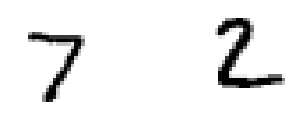

In [6]:
for i, image in enumerate([test_mnist[0], test_mnist[1]]):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

<a id="webservice_score"></a>
### Scoring of a webservice
If you want to make a `score` call on your deployment, please follow a below method:

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Deployment%20Jobs/deployment_jobs_create" 
target="_blank" rel="noopener no referrer">Create deployment job</a>

In [39]:
%%bash -s "$image_1" "$image_2"

curl -sk -X POST \
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    --header "Accept: application/json" \
    --data '{"space_id": "$SPACE_ID","input_data": [{"values": ['"$1"', '"$2"']}]}' \
    "$WML_ENDPOINT_URL/ml/v4/deployments/$DEPLOYMENT_ID/predictions?version=2020-08-01" \
    | python -m json.tool

{
    "predictions": [
        {
            "values": [
                7,
                2
            ]
        }
    ]
}


<a id="deployments_list"></a>
### Listing all deployments

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Deployments/deployments_list" 
target="_blank" rel="noopener no referrer">List deployments details</a>

In [ ]:
%%bash

curl -sk -X GET \
    --header "Authorization: Bearer $TOKEN" \
    --header "Content-Type: application/json" \
    "$WML_ENDPOINT_URL/ml/v4/deployments?space_id=$SPACE_ID&version=2020-08-01" \
    | python -m json.tool

<a id="cleaning"></a>
## 7. Cleaning section

Below section is useful when you want to clean all of your previous work within this notebook.
Just convert below cells into the `code` and run them.

<a id="training_delete"></a>
### Delete training run
**Tip:** You can completely delete a training run with its metadata.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Trainings/trainings_delete" 
target="_blank" rel="noopener no referrer">Deleting training</a>

<a id="deployment_delete"></a>
### Deleting deployment
**Tip:** You can delete existing deployment by calling DELETE method.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Deployments/deployments_delete" 
target="_blank" rel="noopener no referrer">Delete deployment</a>

<a id="model_delete"></a>
### Delete model from repository
**Tip:** If you want to completely remove your stored model and model metadata, just use a DELETE method.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Models/models_delete" 
target="_blank" rel="noopener no referrer">Delete model from repository</a>

<a id="def_delete"></a>
### Delete model definition
**Tip:** If you want to completely remove your model definition, just use a DELETE method.

<a href="https://watson-ml-v4-api.mybluemix.net/wml-restapi-cloud.html#/Model%20Definitions/model_definitions_delete" 
target="_blank" rel="noopener no referrer">Delete model definition</a>

<a id="summary"></a>
## 8. Summary and next steps

 You successfully completed this notebook!.
 
 You learned how to use `cURL` calls to store, deploy and score a Tensorfloow Deep Learning model in WML. 


### Authors

**Jan Sołtysik**, Intern in Watson Machine Learning at IBM

Copyright © 2020, 2021 IBM. This notebook and its source code are released under the terms of the MIT License.